# Testing the capability of CMIP6 GCMs to represent precipitation variability at different temporal scales

Production date: 31-10-2024

Produced by: CMCC foundation - Euro-Mediterranean Center on Climate Change. Albert Martinez Boti.

Most research has focused on projected long-term changes in average climates and extremes, while variability changes have received less attention. However, understanding the evolution of precipitation variability is crucial for accurately modelling climate phenomena and quantifying climate change impacts, particularly on water resources and related socioeconomic factors [[1]]( https://doi.org/10.3390/w15091701) and [[2]](https://doi.org/10.2166/wcc.2024.152). This notebook evaluates the capability of a subset of 16 [CMIP6](https://cds.climate.copernicus.eu/datasets/projections-cmip6?tab=overview) Global Climate Models (GCMs) to represent precipitation variance, focusing on daily data to capture extreme precipitation events. Systematic errors are assessed by comparing model outputs against the [ERA5](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-complete?tab=doc) reanalysis, serving as the reference dataset. The analysis concentrates on the JJA (June, July, August) aggregation period but can be adapted for annual or other seasonal aggregations. Spatial patterns of average values of 2- and 3-year variances are examined for daily precipitation over the historical period from 2004 to 2014, accounting for decadal and multi-decadal timescales. Additionally, the spatially-averaged temporal evolution of the coefficient of variation (obtained by standardising the standard deviation using the mean), including trends, is analysed through 2- and 3-year moving windows and presented as time series focused on India. These insights provide valuable information on the reliability of CMIP6 models for precipitation variability analyses across different time scales.

## 🌍 Use case: Assessing the potential impacts of climate change on precipitation variability over India 

## ❓ Quality assessment question
* **How well do CMIP6 projections represent historic variability of precipitation across the globe? Are there trends affecting precipitation interannual variability over India?**



## 📢 Quality assessment statement

```{admonition} These are the key outcomes of this assessment
:class: note

*For the spatial patterns of average values of 2- and 3-year variances, some variation may be tied to orographic features and regions with high precipitation. This effect is removed in the time series analysis, where the coefficient of variation, which normalises the standard deviation by the mean, is considered.

*Using this approach may highlight the different orographic enhancements characterising the ensemble models, showing that some models display unique dependencies on orography for precipitation variance. 

*Different mechanisms, both dynamic and thermodynamic, may be driving these patterns. For example, differences are evident between models like CMCC and BCC
```

```{figure} 1c0e8cf0-01f8-4c79-a63c-395662058d5e.png
---
width: 900px
alt: Mean Bias SU
---
```

<a id='INITIAL NOTE'></a>
<div class="alert alert-block alert-warning">  
<b>NOTE on the JJA selection</b>:<br> 
In this notebook, we focus on seasonal aggregations to prevent overload. It's important to note that using seasonal temporal aggregations offers only partial insights into the dynamics. For more comprehensive results, it's advisable to also consider other seasons and annual aggregations. However, for the sake of efficiency and to avoid making the notebook too heavy, we have opted to prioritise seasonal aggregations.

## 📋 Methodology

This notebook provides an assessment of systematic errors in representing precipitation variability for a subset of 16 models from the CMIP6 project, focusing on the JJA aggregation (the rainy season in India), though other seasonal or annual aggregations can be configured. Variances have been calculated to represent the variability (similar to [[3]](https://doi.org/10.1029/2020GL090197) and [[4]](https://doi.org/10.1126/sciadv.adj5569)). To also characterise the variability associated with extreme precipitation, daily temporal resolution is used.

The analysis examines spatial patterns of average values of 2- and 3-year variances (to account for decadal and multi-decadal timescales) for daily precipitation over the period 2004–2014, and calculates biases for each model and the ensemble median (per grid cell). Additionally, spatially-averaged temporal evolution of the coefficient of variation (obtained by standardising the standard deviation using the mean), including trends, is analysed through 2- and 3-year moving windows and presented as time series focused on India, following a methodology similar to [[5]](https://doi.org/10.1007/s00704-022-03972-2).

The analysis and results follow the next outline:

**[](climate_projections-cmip6_climate-and-weather-extremes_q01:section-1)**
 * [](climate_projections-cmip6_climate-and-weather-extremes_q01:section-1.1)
 * [](climate_projections-cmip6_climate-and-weather-extremes_q01:section-1.2)
 * [](climate_projections-cmip6_climate-and-weather-extremes_q01:section-1.3)
 * [](climate_projections-cmip6_climate-and-weather-extremes_q01:section-1.4)
 * [](climate_projections-cmip6_climate-and-weather-extremes_q01:section-1.5)
 * [](climate_projections-cmip6_climate-and-weather-extremes_q01:section-1.6)

**[](climate_projections-cmip6_climate-and-weather-extremes_q01:section-2)**
 * [](climate_projections-cmip6_climate-and-weather-extremes_q01:section-2.1)
 * [](climate_projections-cmip6_climate-and-weather-extremes_q01:section-2.2)
 * [](climate_projections-cmip6_climate-and-weather-extremes_q01:section-2.3)

**[3. Plot and describe results](climate_projections-cmip6_climate-and-weather-extremes_q01:section-3)**
 * [](climate_projections-cmip6_climate-and-weather-extremes_q01:section-3.1)
 * [](climate_projections-cmip6_climate-and-weather-extremes_q01:section-3.2)
 * [](climate_projections-cmip6_climate-and-weather-extremes_q01:section-3.3)
 * [](climate_projections-cmip6_climate-and-weather-extremes_q01:section-3.4)
 * [](climate_projections-cmip6_climate-and-weather-extremes_q01:section-3.5)
 * [](climate_projections-cmip6_climate-and-weather-extremes_q01:section-3.6)

## 📈 Analysis and results

(climate_projections-cmip6_climate-and-weather-extremes_q01:section-1)=
### 1. Parameters, requests and functions definition

(climate_projections-cmip6_climate-and-weather-extremes_q01:section-1.1)=
#### 1.1. Import packages

In [1]:
import math
import tempfile
import warnings
import textwrap
warnings.filterwarnings("ignore")

import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
from c3s_eqc_automatic_quality_control import diagnostics, download, plot, utils
import matplotlib.dates as mdates
from xarrayMannKendall import Mann_Kendall_test
from scipy.stats import linregress

(climate_projections-cmip6_climate-and-weather-extremes_q01:section-1.2)=
#### 1.2. Define Parameters

In the "Define Parameters" section, various customisable options for the notebook are specified:

- The initial and ending year used for the historical period can be specified by changing the parameters `year_start` and `year_stop` (2004-2014 is chosen).
- The `timeseries` set the temporal aggregation. For instance, selecting "JJA" implies considering only the JJA season. "Annual" has been selected for this notebook.
- `area` allows specifying the geographical domain of interest when assessing the temporal evolution of the variability. A domain including the Indian Peninsula has been selected.
- The `interpolation_method` parameter allows selecting the interpolation method when regridding is performed. 
- The `chunk` selection allows the user to define if dividing into chunks when downloading the data on their local machine. Although it does not significantly affect the analysis, it is recommended to keep the default value for optimal performance.
- `variance_values` defines the temporal width (in years) over which the variance is calculated. 
- `variable` and `collection_id` are not customisable for this assessment and are set to 'precipitation' and 'CMIP6'. Expert users can use this notebook as a guide to create similar analyses for other variables or model sets (such as CORDEX).

In [2]:
# Time period
year_start = 2004
year_stop = 2014
assert year_start >= 1940

# Choose annual or seasonal timeseries
timeseries = "JJA"
assert timeseries in ("annual", "DJF", "MAM", "JJA", "SON")

# Interpolation method
interpolation_method = "conservative"

# Area to show
area = [38, 68, 5, 98]

# Chunks for download
chunks = {"year": 1}

#Variances temporal agg
variance_values=[2,3]

# Variable
variable = "precipitation"
assert variable in ("precipitation")

#Collection id
collection_id = "CMIP6"
assert collection_id in ("CMIP6")

(climate_projections-cmip6_climate-and-weather-extremes_q01:section-1.3)=
#### 1.3. Define models

The following climate analyses are performed considering a subset of GCMs from CMIP6.

The selected CMIP6 models have available both the historical and SSP5-8.5 experiments.

In [3]:
match variable:
    case "precipitation":
        resample_reduction = "sum"
        era5_variable = "total_precipitation"
        era5_variable_short = "tp"
        cmip6_variable = "precipitation"
        cmip6_variable_short="pr"
        models_cmip6 = (
            "access_cm2",
            "bcc_csm2_mr",
            "cmcc_esm2",
            "cnrm_cm6_1_hr",
            "cnrm_esm2_1",
            "ec_earth3_cc",
            "gfdl_esm4",
            "inm_cm4_8",
            "inm_cm5_0",
            "mpi_esm1_2_lr",
            "miroc6",
            "miroc_es2l", 
            "mri_esm2_0",
            "noresm2_mm",
            "nesm3",
            "ukesm1_0_ll",
        )
        cbars = {"cmap_divergent": "RdBu", "cmap_sequential": "viridis_r"}
    case _:
        raise NotImplementedError(f"{variable=}")

(climate_projections-cmip6_climate-and-weather-extremes_q01:section-1.4)=
#### 1.4. Define ERA5 request

Within this notebook, ERA5 serves as the reference product. In this section, we set the required parameters for the cds-api data-request of ERA5.

In [4]:
request_era = (
    
    "reanalysis-era5-single-levels",
    {
        "product_type": "reanalysis",
        "data_format": "netcdf",
        "time": [f"{hour:02d}:00" for hour in range(24)],
        "variable": era5_variable,
        "year": [
            str(year)
            for year in range(year_start - int(timeseries == "DJF"), year_stop + 1)
        ],  # Include D(year-1)
        "month": [f"{month:02d}" for month in range(1, 13)],
        "day": [f"{day:02d}" for day in range(1, 32)],
        "area":area,
    },
)

request_lsm = (
    request_era[0],
    request_era[1]
    | {
        "year": "1940",
        "month": "01",
        "day": "01",
        "time": "00:00",
        "variable": "land_sea_mask",
    },
)

(climate_projections-cmip6_climate-and-weather-extremes_q01:section-1.5)=
#### 1.5. Define model requests

In this section we set the required parameters for the cds-api data-request.

In [5]:
request_cmip6 = {
    "format": "zip",
    "temporal_resolution": "daily",
    "experiment": "historical",
    "variable": cmip6_variable,
    "year": [
        str(year) for year in range(year_start, year_stop + 1)
    ],  # Include D(year-1)
    "month": [f"{month:02d}" for month in range(1, 13)],
    "day": [f"{day:02d}" for day in range(1, 32)],
    "area": area,
}
model_requests = {}
if collection_id == "CMIP6":
    for model in models_cmip6:
        model_requests[model] = (
            "projections-cmip6",
            download.split_request(request_cmip6 | {"model": model}, chunks=chunks),
        )
else:
    raise ValueError(f"{collection_id=}")

(climate_projections-cmip6_climate-and-weather-extremes_q01:section-1.6)=
#### 1.6. Functions to cache

In this section, functions that will be executed in the caching phase are defined. Caching is the process of storing copies of files in a temporary storage location, so that they can be accessed more quickly. This process also checks if the user has already downloaded a file, avoiding redundant downloads.

Functions description:

- `get_grid_out` and `add_bounds` ensure the regrid is performed properly.

- The `select_timeseries` function subsets the dataset based on the chosen `timeseries` parameter.
  
- The `compute_rolling_variance` calculates the rolling variance.

- The `compute_variance` function selects the temporal aggregation using the `select_timeseries` function. It then computes the rolling variance over the historical period (2004–2014) by calling `compute_rolling_variance`. The window widths are 2 and 3 years, with a step size of one year.

In [6]:
def select_timeseries(ds, timeseries, year_start, year_stop):
    if timeseries == "annual":
        return ds.sel(time=slice(str(year_start), str(year_stop)))
    return ds.where(ds["time"].dt.season == timeseries, drop=True)
    

def compute_rolling_variance(ds, window_years, timeseries, resample_reduction=None):
    
    # Get the total number of days per year or season
    days_per_year = 360 if timeseries == "annual" else 90

    # Total days in the rolling window
    days_in_window = int(days_per_year * window_years)

    ## Apply rolling variance over the calculated window size and calculate the coefficient of variation
    rolling_var = ds.rolling(time=days_in_window, min_periods=days_in_window, center=False).var()
    rolling_mean= ds.rolling(time=days_in_window, min_periods=days_in_window, center=False).mean()
    rolling_CV=(rolling_var**(1/2))/rolling_mean
    
    rolling_var = rolling_var.groupby("time.year").last()
    rolling_CV = rolling_CV.groupby("time.year").last()

    time_last_per_year = ds["time"].groupby("time.year").last().data

    # Reassign the correct time coordinates to the rolling variance dataset
    rolling_var["year"]=time_last_per_year
    rolling_CV["year"]=time_last_per_year
    
    rolling_var=rolling_var.rename({"year":"time"})
    rolling_CV=rolling_CV.rename({"year":"time"})
    
    rolling_var=rolling_var.convert_calendar('proleptic_gregorian', align_on='date', use_cftime=False)
    rolling_CV=rolling_CV.convert_calendar('proleptic_gregorian', align_on='date', use_cftime=False)

    #Units change
    rolling_var *= (1000 ** 2) if resample_reduction else (86400 ** 2)
    
    # Apply the adjust_day function to the time coordinate
    rolling_var["time"] = rolling_var["time"].dt.floor('D')
    rolling_CV["time"]=rolling_CV["time"].dt.floor('D')

    return rolling_var,rolling_CV



def add_bounds(ds):
    for coord in {"latitude", "longitude"} - set(ds.cf.bounds):
        ds = ds.cf.add_bounds(coord)
    return ds

def get_grid_out(request_grid_out, method):
    ds_regrid = download.download_and_transform(*request_grid_out)
    coords = ["latitude", "longitude"]
    if method == "conservative":
        ds_regrid = add_bounds(ds_regrid)
        for coord in list(coords):
            coords.extend(ds_regrid.cf.bounds[coord])
    grid_out = ds_regrid[coords]
    coords_to_drop = set(grid_out.coords) - set(coords) - set(grid_out.dims)
    return grid_out.reset_coords(coords_to_drop, drop=True)

def compute_variance(
    ds, timeseries, year_start, year_stop, variance_values,
    resample_reduction=None, request_grid_out=None, **regrid_kwargs
):
    # Apply resample reduction if specified
    if resample_reduction:
        resampled = ds.resample(time="1D")
        ds = getattr(resampled, resample_reduction)(keep_attrs=True)                       
    
    # Select the time series
    ds = select_timeseries(ds, timeseries, year_start, year_stop)
    ds = ds.convert_calendar('360_day', align_on='year', use_cftime=True)
    
    # Prepare lists for storing rolling variances and coefficients of variance
    rolling_variances, rolling_coefficients_of_variance = [], []

    # Loop through variance values to compute rolling variances and coefficients
    for variance in variance_values:
        rolling_var, rolling_CV = compute_rolling_variance(ds, window_years=variance,
                                                           timeseries=timeseries,
                                                           resample_reduction=resample_reduction)
        rolling_variances.append(rolling_var.expand_dims(variance=[f"rolling variance {variance}"]))
        rolling_coefficients_of_variance.append(rolling_CV.expand_dims(variance=[f"rolling variance {variance}"]))

    # Concatenate and merge into a single dataset with both dimensions
    ds_variances = xr.concat(rolling_variances, dim="variance", coords="minimal", compat="override")
    ds_coefficients = xr.concat(rolling_coefficients_of_variance, dim="variance", coords="minimal", compat="override")
    ds_coefficients = ds_coefficients.rename({list(ds_coefficients.data_vars)[0]: "coefficient_of_variation"})
    ds = xr.merge([ds_variances, ds_coefficients], compat="override")

    # Handle grid output if requested
    if request_grid_out:
        grid_out = get_grid_out(request_grid_out, method="bilinear")# regrid_kwargs["method"])
        ds = diagnostics.regrid(ds, grid_out=grid_out, method="bilinear")#**regrid_kwargs)
    
    return ds

(climate_projections-cmip6_climate-and-weather-extremes_q01:section-2)=
### 2. Downloading and processing

(climate_projections-cmip6_climate-and-weather-extremes_q01:section-2.1)=
#### 2.1. Download and transform ERA5

In this section, the `download.download_and_transform` function from the 'c3s_eqc_automatic_quality_control' package is used to download ERA5 reference data, select the temporal aggregation ("JJA" in this example), compute 2- and 3-year rolling variances from daily data for the historical period (2004-2015), and cache the result to avoid redundant downloads and processing.

In [7]:
transform_func_kwargs = {
    "timeseries": timeseries,
    "year_start": year_start,
    "year_stop": year_stop,
    "variance_values":variance_values,
}

ds_era5 = download.download_and_transform(
    *request_era,
    chunks=chunks,
    transform_chunks=False,
    transform_func=compute_variance,
    transform_func_kwargs=transform_func_kwargs
    | {"resample_reduction": resample_reduction},
)

(climate_projections-cmip6_climate-and-weather-extremes_q01:section-2.2)=
#### 2.2. Download and transform models

In this section, the `download.download_and_transform` function from the 'c3s_eqc_automatic_quality_control' package is employed to download daily data from the CMIP6 models, select the temporal aggregation ("JJA" in this example), compute 2- and 3-year rolling variances from daily data for the historical period (2004-2015), interpolate to ERA5's grid (only for the cases in which it is specified, in the other cases, the original model's grid is mantained), and cache the result (to avoid redundant downloads and processing). 

In [8]:
interpolated_datasets = []
model_datasets = {}
for model, requests in model_requests.items():
    print(f"{model=}")
    model_kwargs = {
        "chunks": chunks if collection_id == "CMIP6" else None,
        "transform_chunks": False,
        "transform_func":  compute_variance,
    }
    # Original model
    model_datasets[model] = download.download_and_transform(
        *requests,
        **model_kwargs,
        transform_func_kwargs=transform_func_kwargs,
    )

    # Interpolated model
    ds = download.download_and_transform(
        *requests,
        **model_kwargs,
        transform_func_kwargs=transform_func_kwargs
        | {
            "request_grid_out": request_lsm,
            "method": interpolation_method,
            "skipna": True,
        },
    )
    interpolated_datasets.append(ds.expand_dims(model=[model]))

ds_interpolated = xr.concat(interpolated_datasets, "model",coords='minimal', compat='override')

model='access_cm2'
model='bcc_csm2_mr'
model='cmcc_esm2'
model='cnrm_cm6_1_hr'
model='cnrm_esm2_1'
model='ec_earth3_cc'
model='gfdl_esm4'
model='inm_cm4_8'
model='inm_cm5_0'
model='mpi_esm1_2_lr'
model='miroc6'
model='miroc_es2l'
model='mri_esm2_0'
model='noresm2_mm'
model='nesm3'
model='ukesm1_0_ll'


(climate_projections-cmip6_climate-and-weather-extremes_q01:section-2.3)=
#### 2.3. Change some attributes 

In [9]:
# Drop 'bnds' dimension if it exists for each dataset and for the interpolated dataset
model_datasets = {model: ds.drop_dims('bnds') if 'bnds' in ds.dims else ds 
                  for model, ds in model_datasets.items()}
ds_interpolated=ds_interpolated.drop("bnds")
ds_era5=ds_era5.rename({era5_variable_short:cmip6_variable_short})

for ds in (ds_era5, ds_interpolated, *model_datasets.values()):
    ds[cmip6_variable_short].attrs = {"long_name": "", "units": "mm²"}

(climate_projections-cmip6_climate-and-weather-extremes_q01:section-3)=
### 3. Plot and describe results

This section will display the following results:

- Maps showing the spatial distribution of the mean values of **2-year variances** for daily precipitation over the period 2004–2014, including ERA5, individual models, the ensemble median (defined as the median of the mean 2-year variance values for the selected subset of models, calculated for each grid cell) and its bias, and the ensemble spread (derived as the standard deviation of the 2-year variance for the selected subset of models).
  
- Maps showing the spatial distribution of the mean values of **3-year variances** for daily precipitation over the period 2004–2014, including ERA5, individual models, the ensemble median (defined as the median of the mean 3-year variance values for the selected subset of models, calculated for each grid cell) and its bias, and the ensemble spread (derived as the standard deviation of the 2-year variance for the selected subset of models).
  
- **Bias maps** of the temporal mean values of the 2- and 3-year variances for each model.
  
- **Timeseries** showing the evolution of the 2-year and 3-year coefficient of variation over the historical period, including trends and inter-model spread.


(climate_projections-cmip6_climate-and-weather-extremes_q01:section-3.1)=
#### 3.1. Define plotting functions

The functions presented here are used to plot the mean values of 2- and 3-year variances for daily precipitation over the period 2004–2014

Three layout types can be displayed, depending on the chosen function:

1. Layout including the reference ERA5 product, the ensemble median, the bias of the ensemble median, and the ensemble spread: `plot_ensemble()` is used.
2. Layout including every model: `plot_models()` is employed.
3. Layout including the bias of every model: `plot_models()` is used again.


In [10]:
#Define function to plot the caption of the figures (for the ensmble case)
def add_caption_ensemble(window,exp):
    #Add caption to the figure
    caption_text= (
        f"Fig {fig_number}. Mean values of {window}-year variance for "
        f"daily precipitation over the {exp} period ({year_start}–{year_stop}) "
        f"for the temporal aggregation of '{timeseries}'. "
        f"The layout includes data corresponding to: (a) ERA5, (b) the ensemble median "
        f"(defined as the median of the mean {window}-year variance values for the selected "
        f"subset of models, calculated for each grid cell), "
        f"(c) the bias of the ensemble median, and (d) the ensemble spread "
        f"(calculated as the standard deviation of the {window}-year variance "
        f"for the selected subset of models)."
    )
            
    wrapped_lines = textwrap.wrap(caption_text, width=105)
    # Add each line to the figure
    for i, line in enumerate(wrapped_lines):
        fig.text(0.05, -0.05  - i * 0.03, line, ha='left', fontsize=10)
    #end captioning


#Define function to plot the caption of the figures (for the individual models case)
def add_caption_models(bias,exp,window):
    #Add caption to the figure
    if bias: 
        caption_text = (
            f"Fig {fig_number}. Mean bias of the {window}-year variance for daily "
            f"precipitation over the {exp} period ({year_start}–{year_stop}) for "
            f"the temporal aggregation of '{timeseries}'.The layout displays each "
            f"individual {collection_id} model."
        )
    else:       
        caption_text = (
            f"Fig {fig_number}. Mean values of the {window}-year variance for daily "
            f"precipitation over the {exp} period ({year_start}–{year_stop}) for the "
            f"temporal aggregation of '{timeseries}'. The layout displays each individual "
            f"{collection_id} model."
        )

    wrapped_lines = textwrap.wrap(caption_text, width=110)
    # Add each line to the figure
    for i, line in enumerate(wrapped_lines):
        fig.text(0, -0.05  - i * 0.03, line, ha='left', fontsize=10)

def set_extent(da, axs, area):
    extent = [area[i] for i in (1, 3, 2, 0)]
    for i, coord in enumerate(extent):
        extent[i] += -1 if i % 2 else +1
    for ax in axs:
        ax.set_extent(extent)


def plot_models(
    data,
    da_for_kwargs=None,
    col_wrap=4,
    subplot_kw={"projection": ccrs.PlateCarree()},
    figsize=None,
    layout="constrained",
    area=area,
    flip_cmaps=False,
    **kwargs,
):
    if isinstance(data, dict):
        assert da_for_kwargs is not None
        model_dataarrays = data
    else:
        da_for_kwargs = da_for_kwargs or data
        model_dataarrays = dict(data.groupby("model"))

    # Get kwargs
    default_kwargs = {"robust": True, "extend": "both"}
    kwargs = default_kwargs | kwargs
    kwargs = xr.plot.utils._determine_cmap_params(da_for_kwargs.values, **kwargs)

    fig, axs = plt.subplots(
        *(col_wrap, math.ceil(len(model_dataarrays) / col_wrap)),
        subplot_kw=subplot_kw,
        figsize=figsize,
        layout=layout,
    )
    axs = axs.flatten()
    for (model, da), ax in zip(model_dataarrays.items(), axs):
        pcm = plot.projected_map(
            da, ax=ax, show_stats=False, add_colorbar=False, **kwargs
        )
        ax.set_title(model)
    set_extent(da_for_kwargs, axs, area)
    fig.colorbar(
        pcm,
        ax=axs.flatten(),
        extend=kwargs["extend"],
        location="right",
        label=f"{da_for_kwargs.attrs.get('long_name', '')} [{da_for_kwargs.attrs.get('units', '')}]",
    )
    return fig


def plot_ensemble(
    da_models,
    da_era5=None,
    subplot_kw={"projection": ccrs.PlateCarree()},
    figsize=None,
    layout="constrained",
    cbar_kwargs=None,
    area=area,
    flip_cmaps=False,
    **kwargs,
):
    # Get kwargs
    default_kwargs = {"robust": True, "extend": "both"}
    kwargs = default_kwargs | kwargs
    kwargs = xr.plot.utils._determine_cmap_params(
        da_models.values if da_era5 is None else da_era5.values, **kwargs
    )
    if da_era5 is None and cbar_kwargs is None:
        cbar_kwargs = {"orientation": "horizontal"}

    # Figure
    fig, axs = plt.subplots(
        *(1 if da_era5 is None else 2, 2),
        subplot_kw=subplot_kw,
        figsize=figsize,
        layout=layout,
    )
    axs = axs.flatten()
    axs_iter = iter(axs)

    # ERA5
    if da_era5 is not None:
        ax = next(axs_iter)
        plot.projected_map(
            da_era5, ax=ax, show_stats=False, cbar_kwargs=cbar_kwargs, **kwargs
        )
        ax.set_title("(a) ERA5")

    # Median
    ax = next(axs_iter)
    median = da_models.median("model", keep_attrs=True)
    plot.projected_map(
        median, ax=ax, show_stats=False, cbar_kwargs=cbar_kwargs, **kwargs
    )
    ax.set_title("(b) Ensemble Median" if da_era5 is not None else "(a) Ensemble Median")

    # Bias
    if da_era5 is not None:
        ax = next(axs_iter)
        with xr.set_options(keep_attrs=True):
            bias = median - da_era5
        plot.projected_map(
            bias,
            ax=ax,
            show_stats=False,
            center=0,
            cbar_kwargs=cbar_kwargs,
            **default_kwargs,
        )
        ax.set_title("(c) Ensemble Median Bias")

    # Std
    ax = next(axs_iter)
    std = da_models.std("model", keep_attrs=True)
    plot.projected_map(
        std, ax=ax, show_stats=False, cbar_kwargs=cbar_kwargs, **default_kwargs
    )
    ax.set_title("(d) Ensemble Standard Deviation" if da_era5 is not None else "(b) Ensemble Standard Deviation")

    set_extent(da_models, axs, area)
    return fig


(climate_projections-cmip6_climate-and-weather-extremes_q01:section-3.2)=
#### 3.2. Plot ensemble maps

In this section, we invoke the `plot_ensemble()` function to visualise the mean values of 2- and 3-year variances for daily precipitation over the period 2004–2014 for: (a) the reference ERA5 product, (b) the ensemble median (defined as the median of the mean 2- and 3-year variance values for the selected subset of models, calculated for each grid cell), (c) the bias of the ensemble median, and (d) the ensemble spread (calculated as the standard deviation of the 2- and 3-year variance for the selected subset of models).

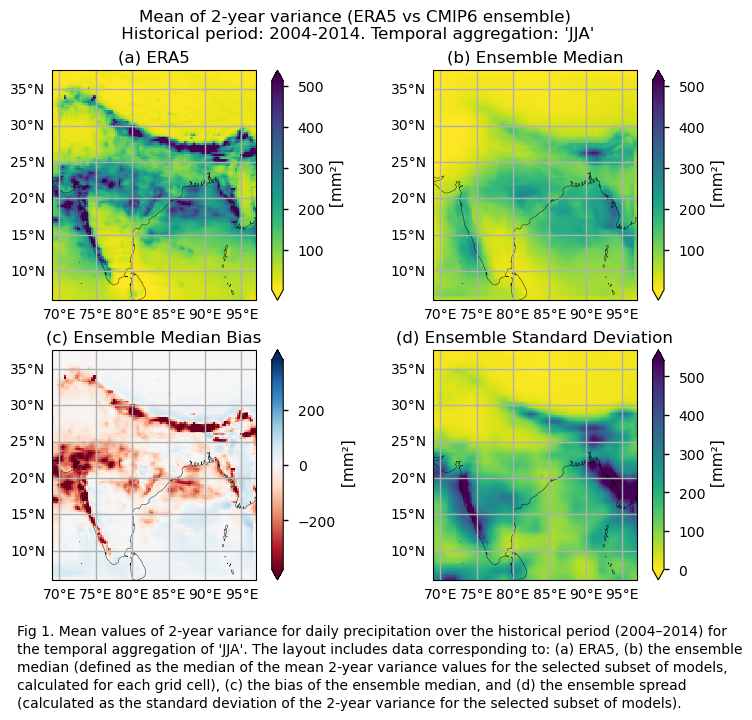

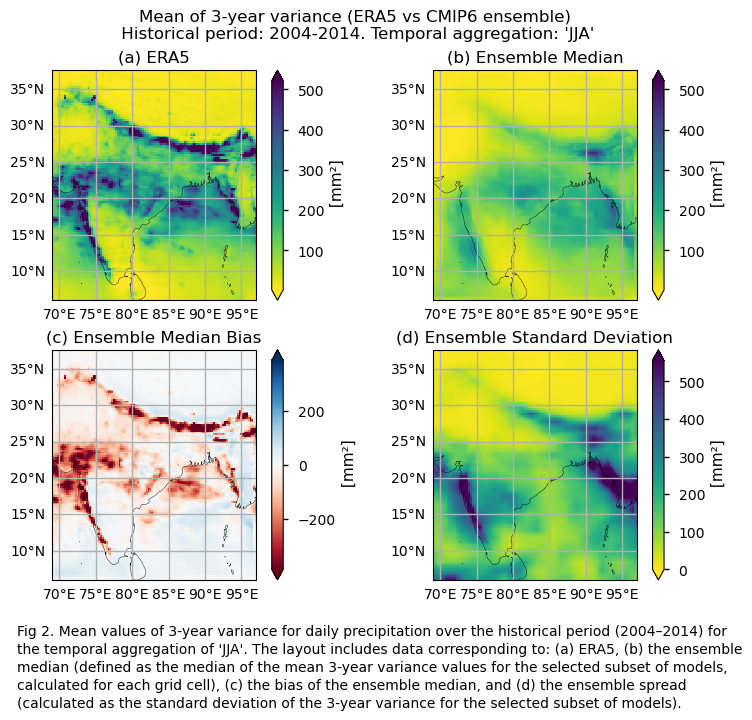

In [11]:
#Change default colorbars
xr.set_options(**cbars)

#Fig number counter
fig_number=1

#Common title
common_title = f"Historical period: {year_start}-{year_stop}. Temporal aggregation: '{timeseries}'"

for window in range(0,2):
    #Select the mean values of the variances
    da = ds_interpolated.mean(dim="time",keep_attrs=True).isel(variance=window)[cmip6_variable_short]
    da_era5=ds_era5.mean(dim="time",keep_attrs=True).isel(variance=window)[cmip6_variable_short]
    #Call the function
    fig = plot_ensemble(da_models=da, da_era5=da_era5,figsize=[7.5,6])
    fig.suptitle(f"Mean of {variance_values[window]}-year variance (ERA5 vs {collection_id} ensemble)\n {common_title}")
    add_caption_ensemble(window=variance_values[window],exp="historical")
    plt.show()
    fig_number=fig_number+1
    print(f"\n")

(climate_projections-cmip6_climate-and-weather-extremes_q01:section-3.3)=
#### 3.3. Plot model maps

In this section, we invoke the `plot_models()` function to visualise the mean values of 2- and 3-year variances for daily precipitation over the period 2004–2014 for every model individually. Note that the model data used in this section maintains its original grid.

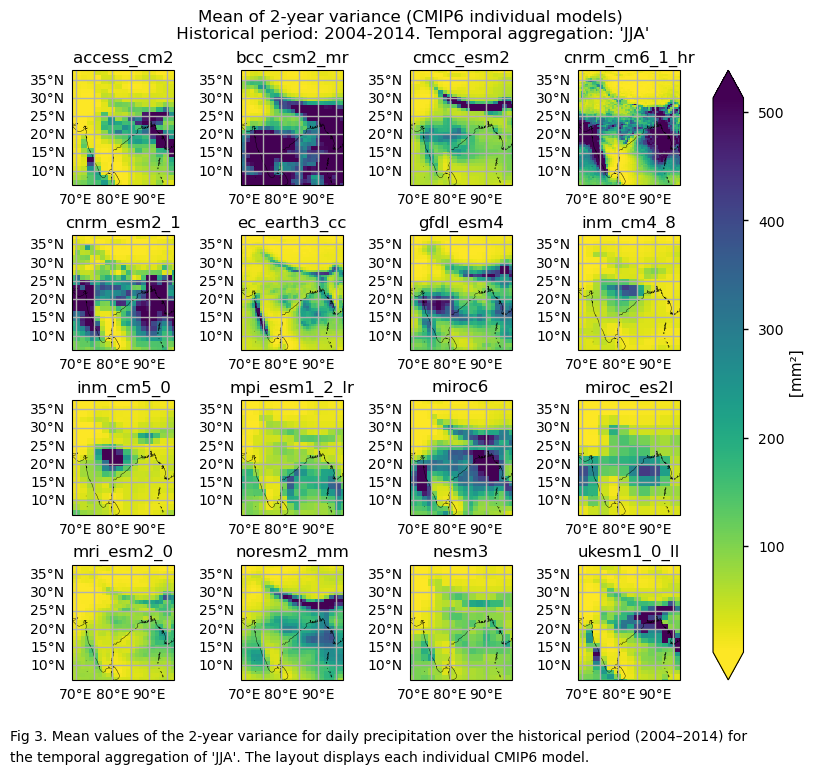

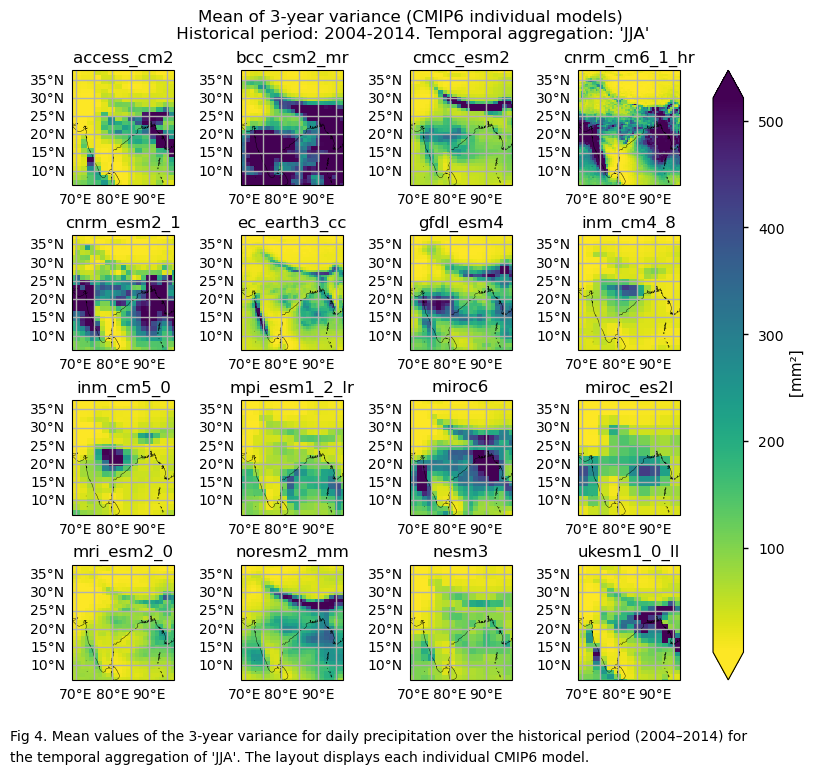

In [12]:
for window in range(0,2):
    da_for_kwargs = ds_era5.mean(dim="time",keep_attrs=True).isel(variance=window)[cmip6_variable_short]
    fig = plot_models(
            data={model: ds.mean(dim="time").isel(variance=window)[cmip6_variable_short] for model, ds in model_datasets.items()},
            da_for_kwargs=da_for_kwargs,
            figsize=[8,7],
        )
    fig.suptitle(f"Mean of {variance_values[window]}-year variance ({collection_id} individual models)\n {common_title}")
    add_caption_models(window=variance_values[window],bias=False,exp="historical")
    plt.show()
    print(f"\n")
    fig_number=fig_number+1

(climate_projections-cmip6_climate-and-weather-extremes_q01:section-3.4)=
#### 3.4. Plot bias maps

In this section, we invoke the `plot_models()` function to visualise the bias for the mean values of 2- and 3-year variances for daily precipitation over the period 2004–2014 for every model individually. Note that the model data used in this section has previously been interpolated to the ERA5 grid.

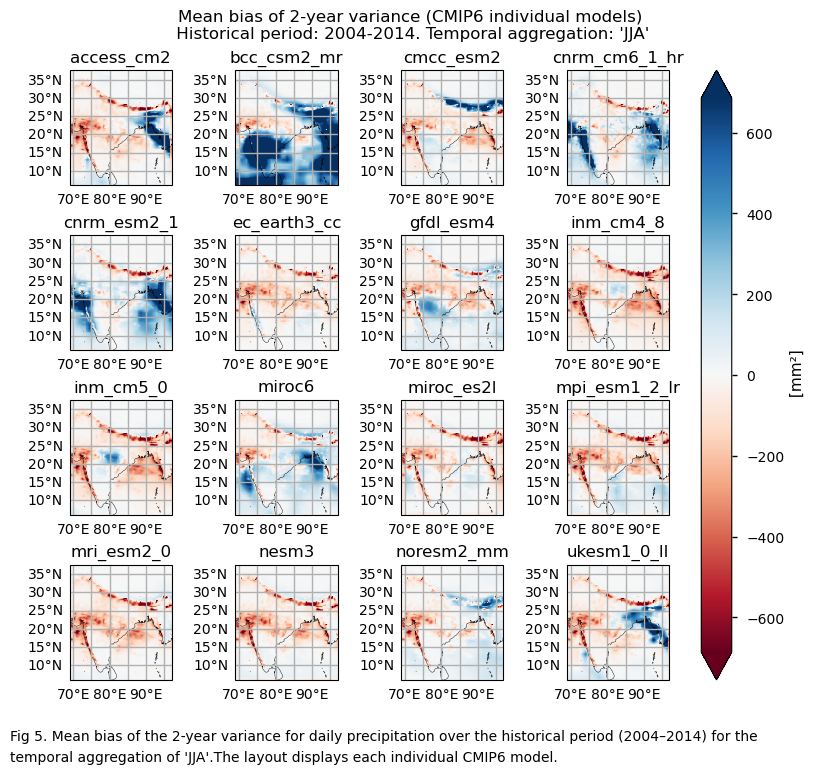

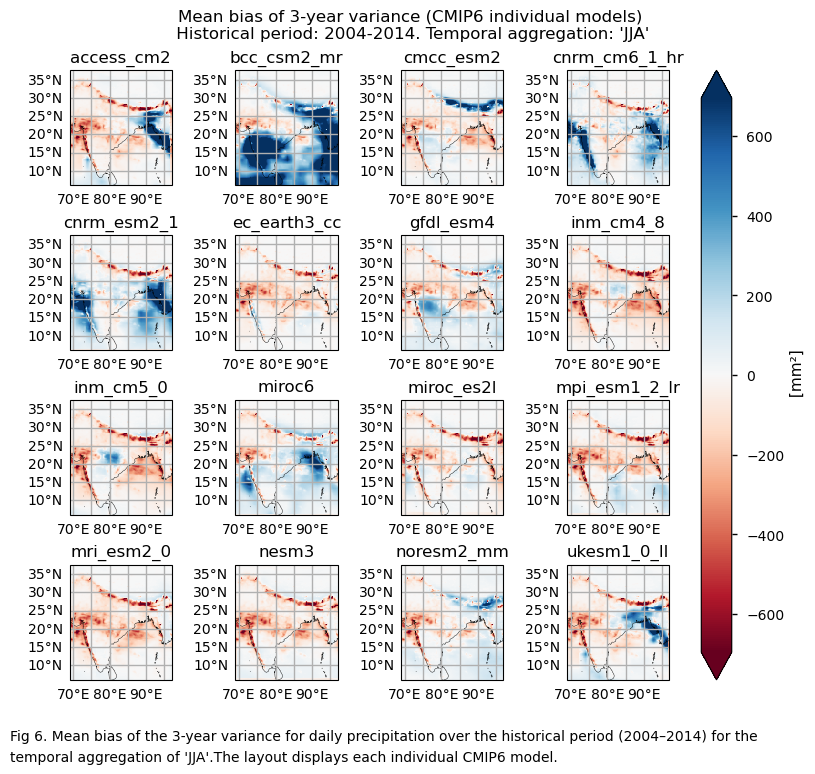

In [13]:
for window in range (0,2):
    with xr.set_options(keep_attrs=True):
        bias = ds_interpolated.mean(dim="time").isel(variance=window) - ds_era5.mean(dim="time").isel(variance=window)
    da = bias[cmip6_variable_short]
    fig = plot_models(data=da, center=0,figsize=[8,7])
    fig.suptitle(f"Mean bias of {variance_values[window]}-year variance ({collection_id} individual models)\n {common_title}")
    add_caption_models(window=variance_values[window],bias=True,exp="historical")
    plt.show()
    print(f"\n")
    fig_number=fig_number+1

(climate_projections-cmip6_climate-and-weather-extremes_q01:section-3.5)=
#### 3.5. Timeseries of the variance

In this last section, we compare the evolution of the 2- and 3-year coefficient of variation spatially averaged for daily precipitation over the period 2004–2014 for the CMIP6 ensemble median and ERA5.

The ensemble spread and the trend of the variances are displayed.

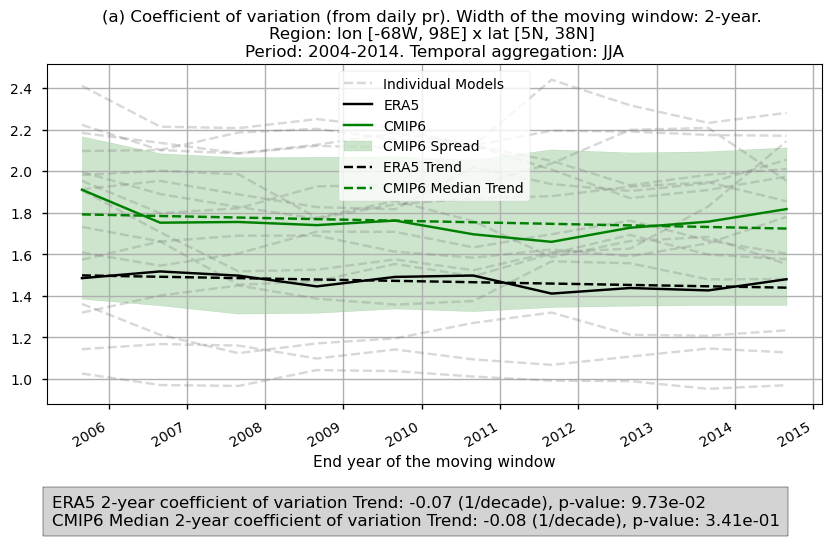

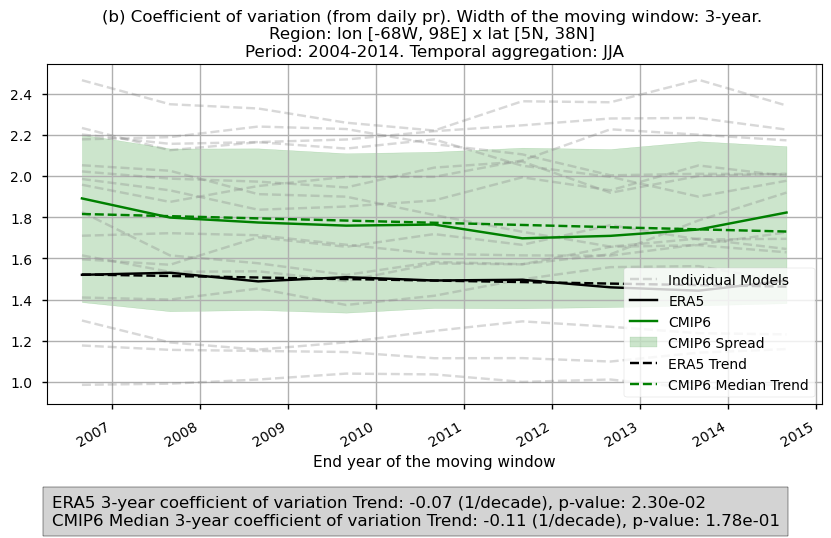

In [14]:
def plot_trend(time_series, var_values, label, color):
    time_numeric = pd.to_numeric(time_series.to_series())
    slope, intercept, _, p_value, _ = linregress(time_numeric, var_values)
    trend = intercept + slope * time_numeric
    slope_per_decade = slope * 10 * (60 * 60 * 24 * 365.25 * 10**9)  # nanoseconds to decade
    plt.plot(time_series, trend, linestyle='--', color=color, label=label)
    return slope_per_decade, p_value

# Define the colors
colors = {"CMIP6": "green", "ERA5": "black"}

# Cutout region
regionalise_kwargs = {
    "lon_slice": slice(area[1], area[3]),
    "lat_slice": slice(area[0], area[2]),
}

# Get the spatial mean for ERA5
era5_mean = diagnostics.spatial_weighted_mean(utils.regionalise(ds_era5, **regionalise_kwargs))["coefficient_of_variation"]

# Get the spatial mean for CMIP6, preserving each model
cmip6_means = [
    diagnostics.spatial_weighted_mean(
        utils.regionalise(ds.expand_dims(model=[model]), **regionalise_kwargs)
    )["coefficient_of_variation"] for model, ds in model_datasets.items()
]

# Calculate the median, ensemble mean, and standard deviation
cmip6_mean_median = xr.concat(cmip6_means, dim="model").median("model", keep_attrs=True)
cmip6_mean_ens_mean = xr.concat(cmip6_means, dim="model").mean("model", keep_attrs=True)
cmip6_mean_std = xr.concat(cmip6_means, dim="model").std("model", keep_attrs=True)

# Initialize list to store trend information
trend_info = []
index_str = 0

# Plotting for each variance
for variance in era5_mean['variance'].values:
    plt.figure(figsize=(10, 5))

    # Select the corresponding variance for ERA5 and CMIP6
    era5_var = era5_mean.sel(variance=variance)
    cmip6_var = cmip6_mean_median.sel(variance=variance)
    cmip6_var_ens_mean = cmip6_mean_ens_mean.sel(variance=variance)

    # Plot individual model series in grey dashed lines
    for model_data in cmip6_means:
        model_var = model_data.sel(variance=variance)

        # Ensure model_var is reduced to 1D for plotting
        model_var_values = model_var.values.flatten() if model_var.ndim > 1 else model_var.values

        plt.plot(model_var['time'], model_var_values, linestyle='--', color="grey", alpha=0.3)

    # Add a legend entry for individual models
    plt.plot([], [], linestyle='--', color='grey', alpha=0.3, label='Individual Models')

    # Plot ERA5 and CMIP6 median time series
    era5_var.plot(label=f"ERA5", color=colors["ERA5"])
    cmip6_var.plot(label=f"CMIP6", color=colors["CMIP6"])

    # Plot ensemble spread (standard deviation)
    std_values = cmip6_mean_std.sel(variance=variance)
    plt.fill_between(
        cmip6_var_ens_mean['time'],
        cmip6_var_ens_mean.values + std_values,
        cmip6_var_ens_mean.values - std_values,
        color=colors["CMIP6"], alpha=0.2, label='CMIP6 Spread'
    )

    # Convert time coordinates to pandas datetime for plotting
    time_numeric_era5 = pd.to_numeric(era5_var['time'].to_series())
    time_numeric_cmip6 = pd.to_numeric(cmip6_var['time'].to_series())

    # Plot trends for ERA5 and CMIP6 Median
    slope_era5, p_value_era5 = plot_trend(era5_var['time'][~np.isnan(era5_var.values)],
                                          era5_var.values[~np.isnan(era5_var.values)], 
                                          f"ERA5 Trend", colors["ERA5"])
    
    slope_cmip6, p_value_cmip6 = plot_trend(cmip6_var['time'][~np.isnan(cmip6_var.values)],
                                            cmip6_var.values[~np.isnan(cmip6_var.values)], 
                                            f"CMIP6 Median Trend", colors["CMIP6"])

    # Append trend information, ensuring the index is within bounds
    if index_str < len(variance_values):
        trend_info.clear()
        trend_info.append((f"ERA5 {variance_values[index_str]}-year coefficient of variation", slope_era5, p_value_era5))
        trend_info.append((f"CMIP6 Median {variance_values[index_str]}-year coefficient of variation", slope_cmip6, p_value_cmip6))

    # Customize plot
    plt.xlabel('End year of the moving window')
    plt.ylabel('')
    plt.title(
        f"({chr(ord('`')+index_str+1)}) Coefficient of variation (from daily {cmip6_variable_short}). "
        f"Width of the moving window: {variance_values[index_str]}-year. \n"
        f"Region: lon [{-area[1]}W, {area[3]}E] x lat [{area[2]}N, {area[0]}N] \n"
        f"Period: {year_start}-{year_stop}. Temporal aggregation: {timeseries}"
    )

    plt.legend()
    plt.grid()

    # Format the x-axis to show the year
    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gcf().autofmt_xdate()

    # Add trend information as text outside the plot
    plt.gcf().text(0.13, -0.015,
                   '\n'.join([f"{name} Trend: {trend:.2f} (1/decade), p-value: {p:.2e}"
                              for name, trend, p in trend_info]),
                   fontsize=12,
                   ha='left', va='center',
                   bbox=dict(boxstyle="square,pad=0.5", edgecolor="black", facecolor="lightgray"))

    plt.show()
    print("\n")
    index_str += 1  


<div>
    <div style="max-width: 800px;">
    <p><strong>Fig 7.</strong> Timeseries of the 2- and 3-year coefficient of variation spatially averaged for daily precipitation over the period 2004–2014 for the CMIP6 ensemble median (green) and ERA5 (black). Dashed lines account for the trend while the shaded area account for the spread of the ensemble. A grey box in the bottom includes the slope of the trend.</p>
</div>

(climate_projections-cmip6_climate-and-weather-extremes_q01:section-3.6)=
#### 3.6. Results summary and discussion

- The spatial patterns of average values for 2- and 3-year variances may reflect influences from orographic features and high-precipitation regions. This impact is removed in the time series analysis, where the coefficient of variation—normalising the standard deviation by the mean—is used.

- This approach may reveal distinct orographic effects across the ensemble models, highlighting unique dependencies on orography for precipitation variance in some models.

- These patterns may be driven by different dynamic and thermodynamic mechanisms, as seen in the contrasts between models like CMCC and BCC.

<a id='RESULTS NOTE'></a>
<div class="alert alert-block alert-warning">  
<b>RESULTS NOTE</b>:<br> 
It is important to note that the results presented are specific to the 16 models chosen, and users should aim to assess as wide a range of models as possible before making a sub-selection.

## ℹ️ If you want to know more

### Key resources

Some key resources and further reading were linked throughout this assessment.

The CDS catalogue entries for the data used were:
* CMIP6 climate projections (Daily - Precipitation): https://cds.climate.copernicus.eu/datasets/projections-cmip6?tab=overview
* ERA5 hourly data on single levels from 1940 to present (Total precipitation): https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels?tab=overview


Code libraries used:
* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`,  prepared by [BOpen](https://www.bopen.eu/)
  
### References
[[1]]( https://doi.org/10.3390/w15091701) 
[[2]](https://doi.org/10.2166/wcc.2024.152)
[[3]](https://doi.org/10.1029/2020GL090197) 
[[4]](https://doi.org/10.1126/sciadv.adj5569)
[[5]](https://doi.org/10.1007/s00704-022-03972-2)